# Step 1: import libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pylab as plt
import seaborn as sns 
import pandas as pd

# Step 2: Load Dataset

In [2]:

data = pd.read_csv("Dataset/train_100r.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,1,18.382336,7.256714,91.377706,451.701127,0.078681,0.135853,0.290649,0.120906,...,26.770957,13.025038,116.746455,962.654199,0.118997,0.319514,0.783059,0.198664,0.529692,0.160792
1,1,0,10.302042,16.758441,97.568306,320.033091,0.129037,0.090188,0.043289,0.018798,...,13.444048,25.704716,96.355024,219.245739,0.157770,0.122358,0.022506,0.109841,0.279209,0.075751
2,2,0,8.045502,16.094636,78.540549,600.655293,0.077613,0.064573,0.007241,0.054136,...,16.217174,22.345908,112.749125,816.143560,0.110365,0.093854,0.411800,0.076750,0.343249,0.093198
3,3,0,11.064261,26.550410,67.836043,415.104126,0.116053,0.104673,0.094656,0.024589,...,30.842052,24.488840,109.580566,735.080454,0.119673,0.174270,0.062492,0.032425,0.361843,0.090056
4,4,1,6.892966,27.320674,155.892797,388.564447,0.116123,0.110978,0.122121,0.046933,...,31.950207,22.585051,89.875289,1392.646916,0.114831,0.166710,0.198205,0.180283,0.342547,0.105414


In [3]:
diagnosis = data['diagnosis']
data.drop( labels= ['id', 'diagnosis' ], axis= 1, inplace= True )
data['diagnosis'] = diagnosis
data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,18.382336,7.256714,91.377706,451.701127,0.078681,0.135853,0.290649,0.120906,0.210508,0.055248,...,13.025038,116.746455,962.654199,0.118997,0.319514,0.783059,0.198664,0.529692,0.160792,1
1,10.302042,16.758441,97.568306,320.033091,0.129037,0.090188,0.043289,0.018798,0.226011,0.055626,...,25.704716,96.355024,219.245739,0.157770,0.122358,0.022506,0.109841,0.279209,0.075751,0
2,8.045502,16.094636,78.540549,600.655293,0.077613,0.064573,0.007241,0.054136,0.186815,0.051772,...,22.345908,112.749125,816.143560,0.110365,0.093854,0.411800,0.076750,0.343249,0.093198,0
3,11.064261,26.550410,67.836043,415.104126,0.116053,0.104673,0.094656,0.024589,0.221436,0.068286,...,24.488840,109.580566,735.080454,0.119673,0.174270,0.062492,0.032425,0.361843,0.090056,0
4,6.892966,27.320674,155.892797,388.564447,0.116123,0.110978,0.122121,0.046933,0.301315,0.059410,...,22.585051,89.875289,1392.646916,0.114831,0.166710,0.198205,0.180283,0.342547,0.105414,1


# Step 3: Exploratory Data Analysis

In [4]:
# Size of data set
data.shape

(25524, 31)

<p style="text-align: justify "> 
    We have 25524 records and 32 features. Out of 32 features we have 31 independent features and the dependent feature is diagnosis
</p>


In [5]:
# information about data set 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25524 entries, 0 to 25523
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              25524 non-null  float64
 1   texture_mean             25524 non-null  float64
 2   perimeter_mean           25524 non-null  float64
 3   area_mean                25524 non-null  float64
 4   smoothness_mean          25524 non-null  float64
 5   compactness_mean         25524 non-null  float64
 6   concavity_mean           25524 non-null  float64
 7   concave points_mean      25524 non-null  float64
 8   symmetry_mean            25524 non-null  float64
 9   fractal_dimension_mean   25524 non-null  float64
 10  radius_se                25524 non-null  float64
 11  texture_se               25524 non-null  float64
 12  perimeter_se             25524 non-null  float64
 13  area_se                  25524 non-null  float64
 14  smoothness_se         

In [6]:
# see the number of null values 
for feature_name in data.columns:
    print(f"{feature_name} -> {data[feature_name].isna().sum()}")

radius_mean -> 0
texture_mean -> 0
perimeter_mean -> 0
area_mean -> 0
smoothness_mean -> 0
compactness_mean -> 0
concavity_mean -> 0
concave points_mean -> 0
symmetry_mean -> 0
fractal_dimension_mean -> 0
radius_se -> 0
texture_se -> 0
perimeter_se -> 0
area_se -> 0
smoothness_se -> 0
compactness_se -> 0
concavity_se -> 0
concave points_se -> 0
symmetry_se -> 0
fractal_dimension_se -> 0
radius_worst -> 0
texture_worst -> 0
perimeter_worst -> 0
area_worst -> 0
smoothness_worst -> 0
compactness_worst -> 0
concavity_worst -> 0
concave points_worst -> 0
symmetry_worst -> 0
fractal_dimension_worst -> 0
diagnosis -> 0


<p style="text-align: justify "> 
    We do not have any missing values, as we see from output of the above code snippet.
</p>

0    12766
1    12758
Name: diagnosis, dtype: int64



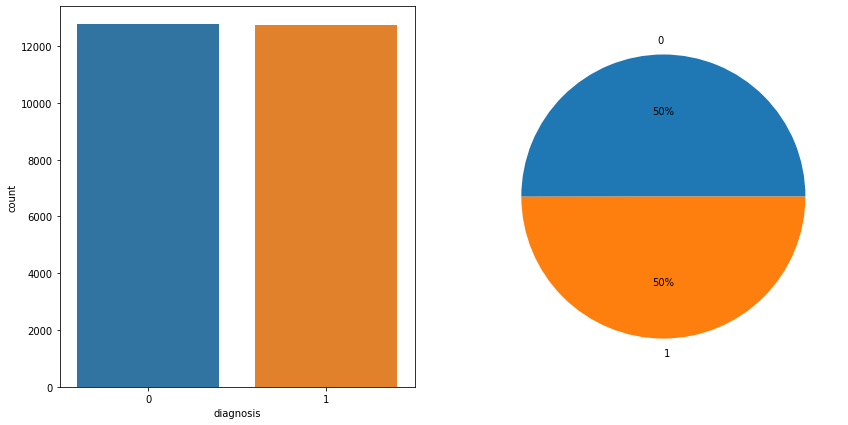

In [7]:
# Class distribution of Output/dependent feature

print( data['diagnosis'].value_counts() )
print()

plt.figure(figsize= (14, 7))

plt.subplot(1, 2, 1)
sns.countplot(x = 'diagnosis' , data = data)

plt.subplot(1, 2, 2)
plt.pie(data['diagnosis'].value_counts() , labels= [0, 1], autopct='%.0f%%')

plt.show()

<p style="text-align: justify "> 
In this data set we have equal number of data points for each class. i.e; malignant has 12766 and benign has 12758 records 
</p>